In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
# Assigning numerical value to every category of species --- 'setosa':0 , 'versicolor':1, 'virginica':2

encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,1
136,6.3,3.4,5.6,2.4,2
55,5.7,2.8,4.5,1.3,1
142,5.8,2.7,5.1,1.9,2
60,5.0,2.0,3.5,1.0,1


In [7]:
df = df[['sepal_length','petal_length','species']]

In [8]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [9]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### OVR (One Vs Rest) Approach

In [11]:
clf = LogisticRegression(multi_class='ovr')

In [12]:
# Training Model

clf.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [13]:
y_pred = clf.predict(X_test)

In [14]:
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [15]:
y_test

6      0
3      0
113    2
12     0
24     0
129    2
25     0
108    2
128    2
45     0
48     0
42     0
35     0
5      0
85     1
54     1
41     0
96     1
144    2
89     1
77     1
74     1
115    2
94     1
87     1
29     0
2      0
127    2
44     0
125    2
Name: species, dtype: int64

In [16]:

print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [17]:
# Confusion Matrix -- Only one error is found --> telling 1(Actual) 2(Predicted).

pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [18]:
# Prediction Using predict_proba() --> Finds out the probability of having a query point in class 0 , 1 , 2.

query = np.array([[3.4,2.7]])
clf.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.44387139, 0.55512309, 0.00100552]])

In [19]:
# 'versicolor' probability is highest i.e., 0.55. Hence, during prediction it comes out to be 1.

clf.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [24]:
!pip install mlxtend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


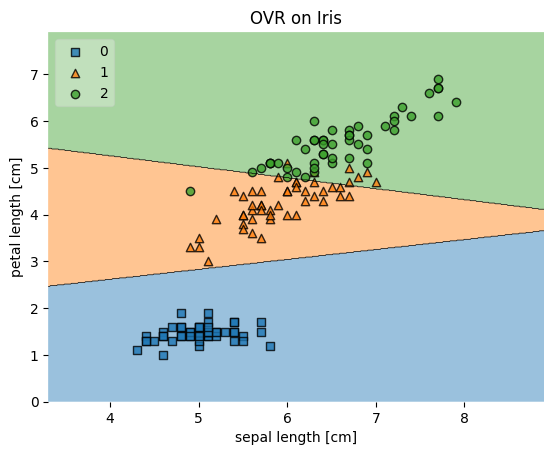

In [20]:
# Plotting Decision Region

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('OVR on Iris')

plt.show()

### Softmax Logistic Regression / Multinomial Logistic Regression Approach

In [21]:
mul = LogisticRegression(multi_class='multinomial')

In [22]:
# Training Model

mul.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [23]:
y_pred = mul.predict(X_test)

In [24]:
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [25]:
y_test

6      0
3      0
113    2
12     0
24     0
129    2
25     0
108    2
128    2
45     0
48     0
42     0
35     0
5      0
85     1
54     1
41     0
96     1
144    2
89     1
77     1
74     1
115    2
94     1
87     1
29     0
2      0
127    2
44     0
125    2
Name: species, dtype: int64

In [26]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [27]:
# Confusion Matrix -- Only one error is found --> telling 1(Actual) 2(Predicted).

pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [29]:
# Prediction Using predict_proba() --> Finds out the probability of having a query point in class 0 , 1 , 2.

query = np.array([[3.4,2.7]])
mul.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [30]:
# 'setosa' probability is highest i.e., 7.25957888e-01. Hence, during prediction it comes out to be 0.

mul.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


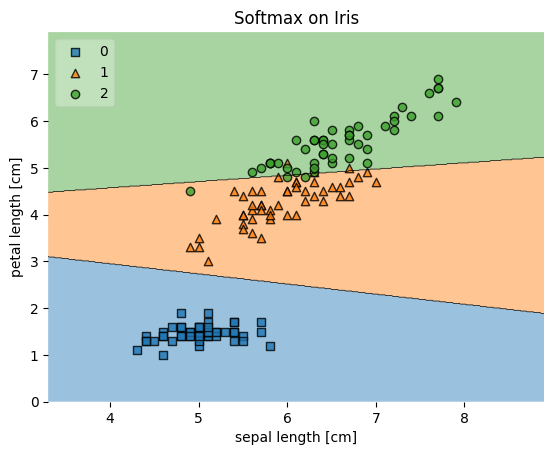

In [31]:
# Plotting Decision Region

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, mul, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()